In [1]:
import pandas as pd


In [2]:
#read the data
sales_data=pd.read_excel("salesdata.xls")

In [3]:
sales_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:

sales_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
print(f'{sales_data.shape[0]} samples and {sales_data.shape[1]} features in the sales  dataset.')

9994 samples and 21 features in the sales  dataset.


In [6]:
sales_data.describe(include = 'O')


,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [7]:
sales_data.describe(include = 'float64')

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,229.858001,0.156203,28.656896
std,623.245101,0.206452,234.260108
min,0.444000,0.000000,-6599.978000
25%,17.280000,0.000000,1.728750
50%,54.490000,0.200000,8.666500
75%,209.940000,0.200000,29.364000
max,22638.480000,0.800000,8399.976000


In [8]:
sales_data.describe(include = 'int64')

,Row ID,Postal Code,Quantity
count,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,3.789574
std,2885.163629,32063.693350,2.225110
min,1.000000,1040.000000,1.000000
25%,2499.250000,23223.000000,2.000000
50%,4997.500000,56430.500000,3.000000
75%,7495.750000,90008.000000,5.000000
max,9994.000000,99301.000000,14.000000


In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [10]:
#Check the time spam
sales_data['Order Date'].min(), sales_data['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

### Data mining 

In [11]:
#missing data
total = sales_data.isnull().sum().sort_values(ascending=False)
percent = (sales_data.isnull().sum()/sales_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total missing values', 'Percent'])
missing_data.head(20)

,Total missing values,Percent
Row ID,0,0.0
Postal Code,0,0.0
Discount,0,0.0
Quantity,0,0.0
Sales,0,0.0
Product Name,0,0.0
Sub-Category,0,0.0
Category,0,0.0
Product ID,0,0.0
Region,0,0.0


In [12]:
#checking for duplicate values
sales_data[sales_data.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [13]:
# checking Unique count
sales_data.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

In [14]:
# Filtering dataset of furniture sales
furniture_data = sales_data[sales_data['Category'] == 'Furniture']

## Exploratory Data Analysis (EDA)

### 1) Seperating categorical and numerical columns

In [15]:
def separate_data_types(data):
    categorical=[]
    continuous=[]
    for column in data.columns:
        if data[column].nunique()<10:
            categorical.append(column)
        else:
            continuous.append(column)
    return categorical,continuous

In [16]:
categorical,continuous=separate_data_types(sales_data)
from tabulate import tabulate
table=[categorical,continuous]
print(tabulate({"categorical":categorical,
                "continuous":continuous},headers=["categorical","continuous"]))

categorical    continuous
-------------  -------------
Ship Mode      Row ID
Segment        Order ID
Country        Order Date
Region         Ship Date
Category       Customer ID
               Customer Name
               City
               State
               Postal Code
               Product ID
               Sub-Category
               Product Name
               Sales
               Quantity
               Discount
               Profit


In [17]:
continuous.remove("Order ID")
categorical.append("Order ID")
continuous.remove("Customer ID")
categorical.append("Customer ID")

continuous.remove("Customer Name")
categorical.append("Customer Name")

continuous.remove("City")
categorical.append("City")

continuous.remove("State")
categorical.append("State")

continuous.remove("Product ID")
categorical.append("Product ID")

continuous.remove("Product Name")
categorical.append("Product Name")

continuous.remove("Sub-Category")
categorical.append("Sub-Category")

In [18]:
from tabulate import tabulate
table = [categorical,continuous]
print(tabulate({'categorical':categorical,
                'continuous': continuous}, headers = ['categorical','continuous']))

categorical    continuous
-------------  ------------
Ship Mode      Row ID
Segment        Order Date
Country        Ship Date
Region         Postal Code
Category       Sales
Order ID       Quantity
Customer ID    Discount
Customer Name  Profit
City
State
Product ID
Product Name
Sub-Category


## Identify Outliers

In [19]:
import numpy as np

In [20]:
print('row and columns before removing outliers:',sales_data.shape)
print('wait till shape after removing outlier is printed...')

def myOutliers(data1,col):
    q3=np.quantile(data1[col],0.75)
    q1=np.quantile(data1[col],0.25)
    iqr=q3-q1
    
    global mylist
    global my_outlier_data
    
    lower_range=q1-1.5*iqr
    upper_range=q3+1.5*iqr 
    
    print('the lower range of',col,'is',lower_range)
    print('the upper range of',col,'is',upper_range)
    
    mylist=[x for x in data1[col] if ((x<lower_range)|(x>upper_range))]
    print('total outliers in',col,'are',len(mylist))
    my_outlier_data=data1.loc[data1[col].isin(mylist)]

row and columns before removing outliers: (9994, 21)
wait till shape after removing outlier is printed...


In [21]:
for i in continuous:
    print('i is',i)
    myOutliers(sales_data,i)
    print('***************************************************')

i is Row ID
the lower range of Row ID is -4995.5
the upper range of Row ID is 14990.5
total outliers in Row ID are 0
***************************************************
i is Order Date
the lower range of Order Date is 2012-06-04T00:00:00.000000000
the upper range of Order Date is 2020-05-01T00:00:00.000000000
total outliers in Order Date are 0
***************************************************
i is Ship Date
the lower range of Ship Date is 2012-06-08T00:00:00.000000000
the upper range of Ship Date is 2020-05-05T00:00:00.000000000
total outliers in Ship Date are 0
***************************************************
i is Postal Code
the lower range of Postal Code is -76954.5
the upper range of Postal Code is 190185.5
total outliers in Postal Code are 0
***************************************************
i is Sales
the lower range of Sales is -271.71000000000004
the upper range of Sales is 498.93
total outliers in Sales are 1167
***************************************************
i is Qu

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

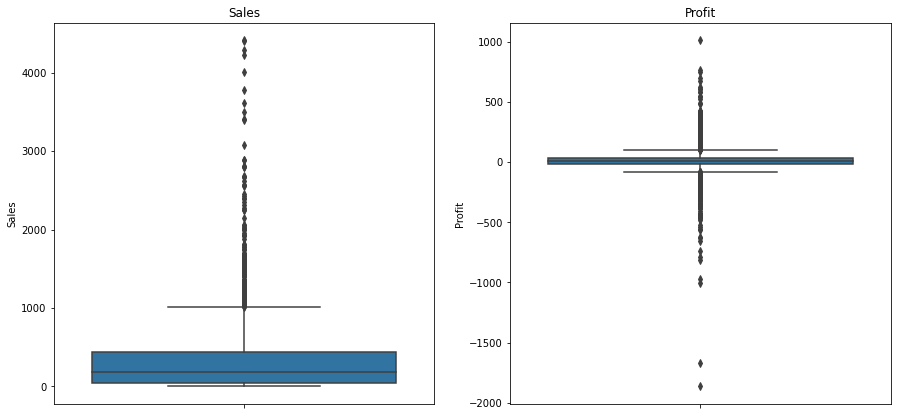

In [23]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.boxplot(y=furniture_data['Sales'],ax=ax[0]).set(title='Sales')
sns.boxplot(y=furniture_data['Profit'],ax=ax[1]).set(title='Profit')

plt.show()

### EDA

### Univariate Analysis

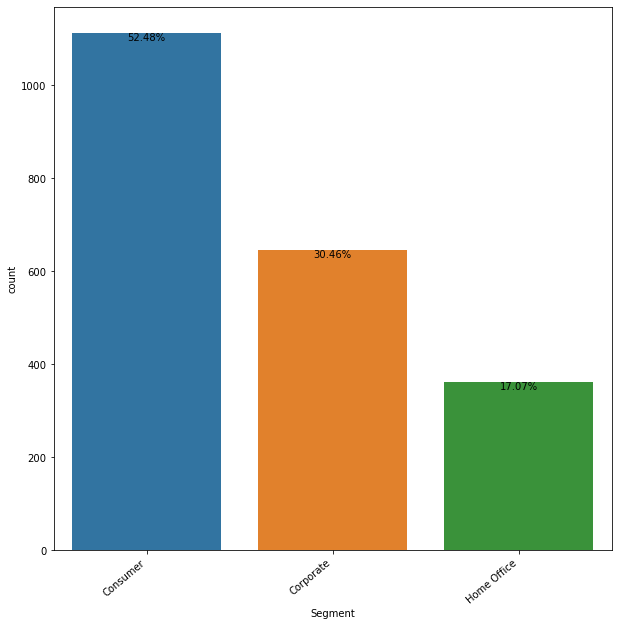

<Figure size 432x288 with 0 Axes>

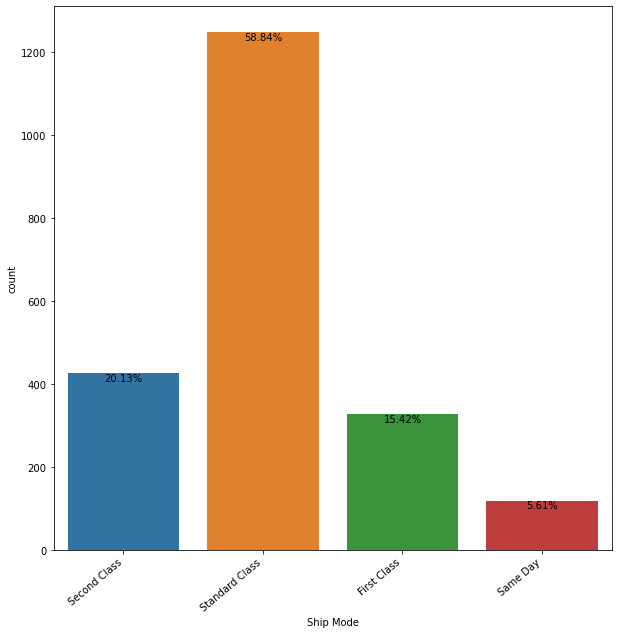

<Figure size 432x288 with 0 Axes>

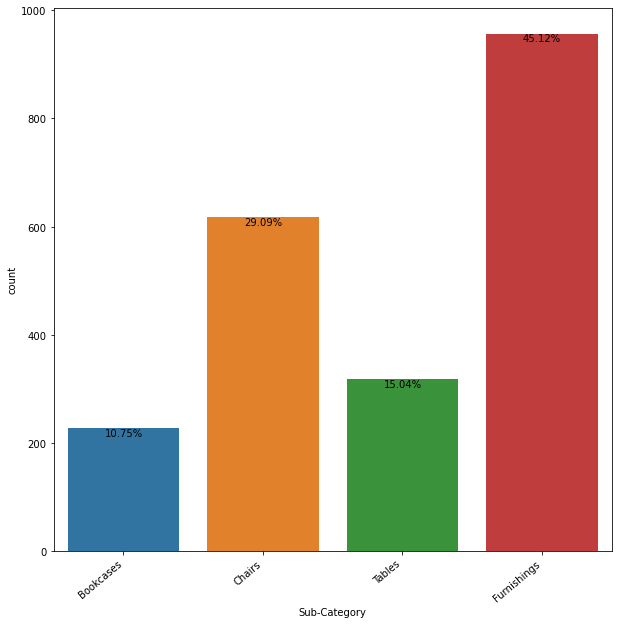

<Figure size 432x288 with 0 Axes>

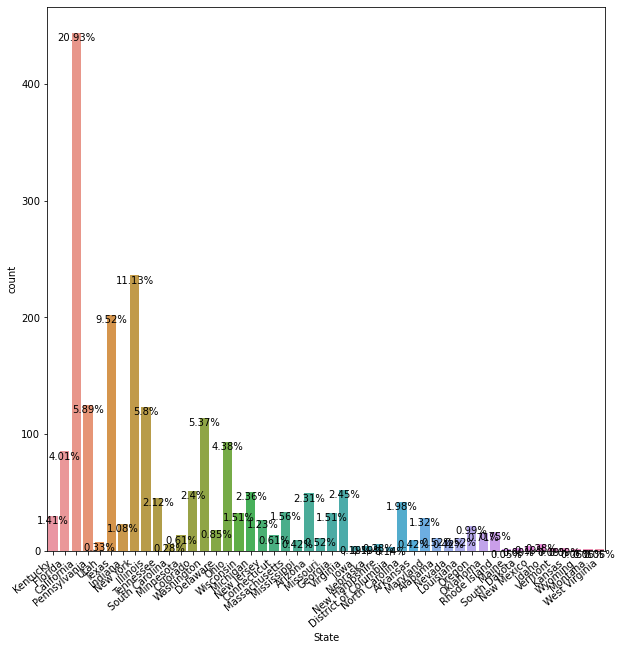

<Figure size 432x288 with 0 Axes>

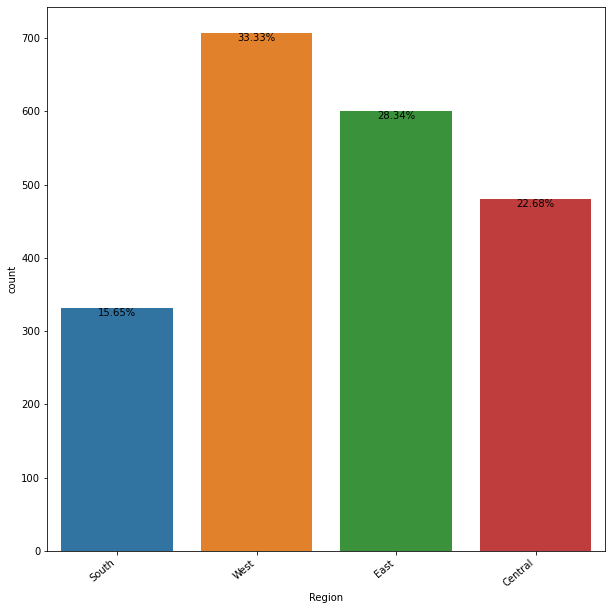

<Figure size 432x288 with 0 Axes>

In [24]:
list_1=['Segment','Ship Mode','Sub-Category','State','Region']
for i in list_1:
    
    fig,ax= plt.subplots(figsize=(10,10))
    ax=sns.countplot(x=furniture_data[i])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

    count=len(furniture_data[i])

    for bar in ax.patches:
        percentage = f'{round((bar.get_height()/count)*100,2)}%'

        x=bar.get_x()+bar.get_width()/2
        y=bar.get_height()
        ax.annotate(percentage,(x,y),ha='center',va='top')

    plt.show()
    plt.savefig("squares.jpeg")

### Bivariate Analysis

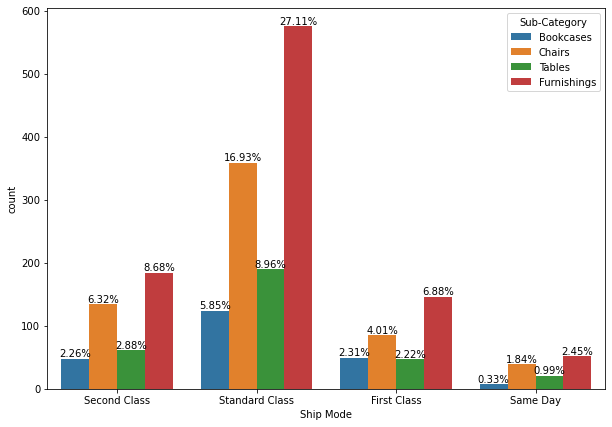

In [25]:
fig,ax = plt.subplots(figsize=(10,7))
sns.countplot(x='Ship Mode' , hue='Sub-Category', data=furniture_data )
for bar in ax.patches:
    percentage = f'{round((bar.get_height()/count)*100,2)}%'
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha='center',va='bottom')
plt.show()

### Multivariate Analysis

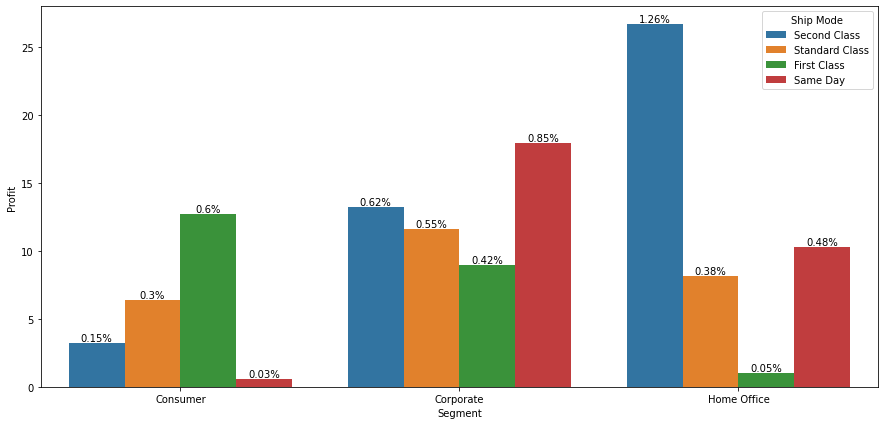

In [26]:
fig,ax= plt.subplots(figsize=(15,7))
sns.barplot(x=furniture_data['Segment'],y=furniture_data['Profit'],hue=furniture_data['Ship Mode'],ci=None,ax=ax)

count=len(furniture_data['Sales'])

for bar in ax.patches:
    percentage = f'{round((bar.get_height()/count)*100,2)}%'
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha='center',va='bottom')
    
plt.show()

#### Dropping the unneceesary columns 

In [27]:
columns = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',  'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture = furniture_data.drop(columns,axis = 1)

In [28]:
furniture_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [29]:
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])

furniture.sort_values(by='Order Date')

furniture=furniture.set_index('Order Date')


furniture=furniture[['Sales']]


In [30]:
furniture.head()

,Sales
Order Date,
2016-11-08,261.9600
2016-11-08,731.9400
2015-10-11,957.5775
2014-06-09,48.8600
2014-06-09,1706.1840


In [126]:

sales = furniture.resample('M').mean() #M stands for months # w stands for week
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-01-31 to 2017-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


<AxesSubplot:xlabel='Order Date'>

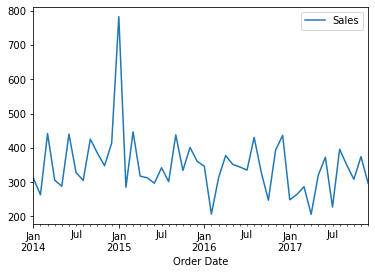

In [127]:
sales.plot()

###  Perform some visual inspections about the data. 

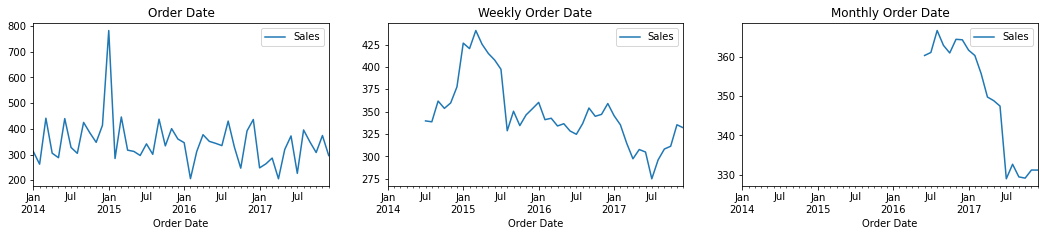

In [128]:
fig, ax=plt.subplots(1,3, figsize=(18,3))
col = "Order Date"
ax[0].set_title(col)
ax[1].set_title("Weekly " + col)
ax[2].set_title("Monthly "+ col)
sales.plot(ax=ax[0])
sales.rolling(window=7).mean().plot(ax=ax[1])
sales.rolling(window=30).mean().plot(ax=ax[2])
plt.show()

In [129]:

from statsmodels.tsa.seasonal import seasonal_decompose


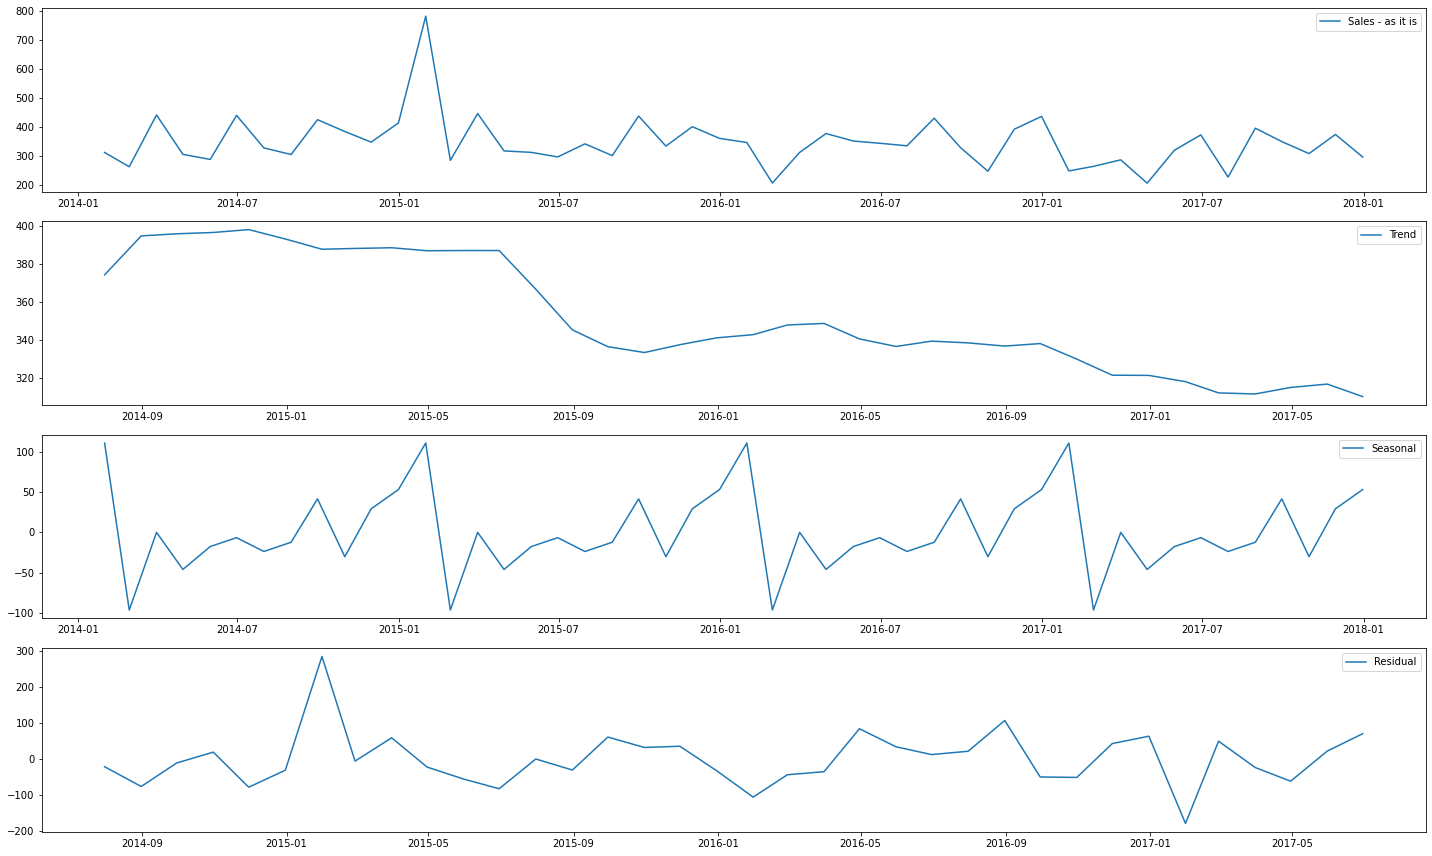

In [130]:
decomposition=seasonal_decompose(sales)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(sales,label='Sales - as it is')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

In [131]:
# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

In [132]:
# dickey-fuller test for stationarity
def checkStationarity():
    pvalue = adfuller(data)[1]
    '''
    output:-> 
    1) test statistic, 
    2) p-value, 
    3) number of lags, 
    4) total observations
    
    '''
    
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)
        
    return(msg)

In [133]:
res = adfuller(sales)
if res[1] < 0.05:
    print('data is stationary')
else:
    print('data is not stationary')
print(res[1])

data is stationary
9.093398510006879e-10


## Moving Average

In [134]:
lags = 4
moving_avg = sales.rolling(window=lags).mean()

In [135]:
df_ts = pd.DataFrame({'actual':sales['Sales'], 'ma':moving_avg['Sales']})
print(df_ts)

                actual          ma
Order Date                        
2014-01-31  312.126250         NaN
2014-02-28  262.808286         NaN
2014-03-31  441.635030         NaN
2014-04-30  305.570654  330.535055
2014-05-31  288.032792  324.511690
2014-06-30  440.204187  368.860666
2014-07-31  327.910636  340.429567
2014-08-31  305.014438  340.290513
2014-09-30  425.294300  374.605890
2014-10-31  384.507719  360.681773
2014-11-30  347.820527  365.659246
2014-12-31  414.134682  392.939307
2015-01-31  782.662773  482.281425
2015-02-28  284.943091  457.390269
2015-03-31  446.420821  482.040342
2015-04-30  317.445409  457.868024
2015-05-31  312.498350  340.326918
2015-06-30  296.699192  343.265943
2015-07-31  341.860500  317.125863
2015-08-31  301.206006  313.066012
2015-09-30  437.883717  344.412354
2015-10-31  334.072875  353.755774
2015-11-30  401.049773  368.553093
2015-12-31  360.715925  383.430572
2016-01-31  346.488318  360.581723
2016-02-29  206.607947  328.715491
2016-03-31  312.2217

In [136]:
df_ts.actual.head(lags).mean()

330.5350549658674

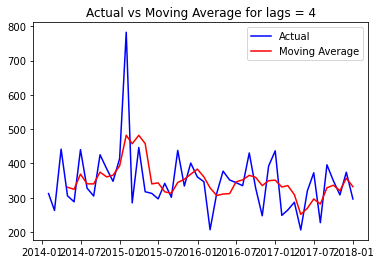

In [137]:
# plot the actual and moving average for comparison
plt.plot(df_ts.actual, color='blue',label = 'Actual')
plt.plot(df_ts.ma, color='red', label = 'Moving Average')
plt.title('Actual vs Moving Average for lags = ' + str(lags))
plt.legend()
plt.show()

## Exponential Smoothing

In [138]:
data = sales['Sales']

In [139]:
from statsmodels.tsa.statespace.tools import diff


In [140]:
from pmdarima.arima import auto_arima

In [141]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [142]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing

data is stationary
9.093398510006879e-10


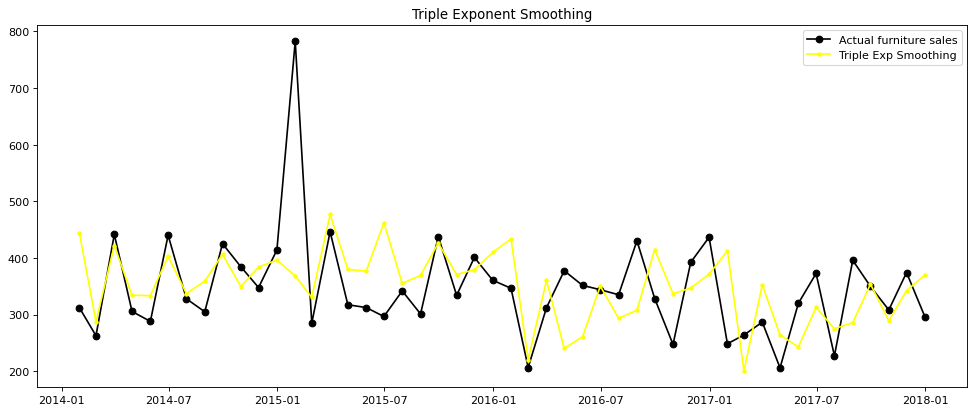

In [143]:
### Triple Exponent Smoothing

# build model
model = ExponentialSmoothing(sales,trend='add',seasonal='add',seasonal_periods=12).fit()

# plot the actual and triple smoothing values
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(sales, marker='o',color='black',label='Actual furniture sales')
plt.plot(model.fittedvalues,marker='.',color='yellow',label='Triple Exp Smoothing')
plt.legend()
plt.title('Triple Exponent Smoothing')

model.forecast(12)



# Stationarity check
res = adfuller(sales)
if res[1] < 0.05:
    print('data is stationary')
else:
    print('data is not stationary')
print(res[1])

### Plot ACF and PACF

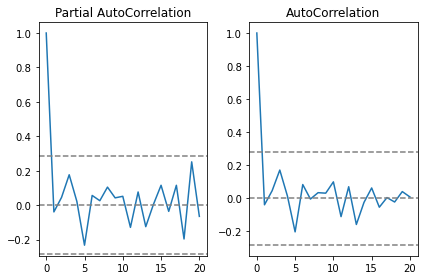

In [144]:
# p -> PACF (partial autocorrelation graph)
# q -> ACF (auto correlation graph)
# d -> differential level (from top)

# since, lags cannot be determined at the beginning, set a random number initially
lag_acf = acf(data.dropna(), nlags=20)
lag_pacf = pacf(data.dropna(), nlags=20, method='ols')

# plot PACF (p)
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(sales)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(sales)),linestyle='--',color="gray")
plt.title("Partial AutoCorrelation")

# plot ACF (q)
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(sales)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(sales)),linestyle='--',color="gray")
plt.title("AutoCorrelation")

plt.tight_layout()

### Split the data into a 80:20 ratio

In [145]:
ss = int(0.8 * len(sales))

train = sales.iloc[:ss]
test = sales.iloc[ss:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 38, test = 10


### Use auto ARIMA for selection of p, d, q

In [146]:
# auto ARIMA (to help in the selection of p,d,q)
m1 = auto_arima(furniture['Sales'],start_p=0,max_p=1, start_q=0,max_q=1, seasonal=False, trace=True)
print(m1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=33246.064, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=32943.891, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=33044.579, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.83 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=32406.054, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=32411.391, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=32407.084, Time=0.41 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=32406.739, Time=0.26 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 2.233 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2121
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -16200.027
Date:                Thu, 05 May 2022   AIC                          32406.054
Time:                        09:22

### Split data into training and test parts

In [147]:
# split the data into train and test
ss = int(0.8 * len(sales))

train = sales.iloc[:ss]
test = sales.iloc[ss:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 38, test = 10


### Build the ARMA Model

In [148]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

# pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [149]:
# start with initial values for p and q
p=1; q=0
m1 = ARIMA(train,order=(p,0,q)).fit()
print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   38
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -226.170
Date:                Thu, 05 May 2022   AIC                            458.341
Time:                        09:22:32   BIC                            463.254
Sample:                    01-31-2014   HQIC                           460.089
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        355.2397     21.098     16.838      0.000     313.889     396.590
ar.L1         -0.0714      0.324     -0.220      0.826      -0.707       0.564
sigma2      8651.8205   1575.542      5.491      0.0

In [150]:
# predictions
predictions = m1.predict(0,len(test)-1)
print(predictions)

Order Date
2014-01-31    355.239700
2014-02-28    358.316200
2014-03-31    361.835443
2014-04-30    349.074681
2014-05-31    358.783996
2014-06-30    360.035467
2014-07-31    349.176783
2014-08-31    357.189854
2014-09-30    358.823686
2014-10-31    350.240727
Freq: M, Name: predicted_mean, dtype: float64


       actual   predicted         err
0  286.669600  355.239700  -68.570100
1  206.044502  358.316200 -152.271698
2  319.953928  361.835443  -41.881515
3  372.717386  349.074681   23.642706
4  227.173500  358.783996 -131.610496
5  395.945487  360.035467   35.910020
6  349.737422  349.176783    0.560638
7  308.226313  357.189854  -48.963541
8  374.310253  358.823686   15.486566
9  296.296857  350.240727  -53.943870


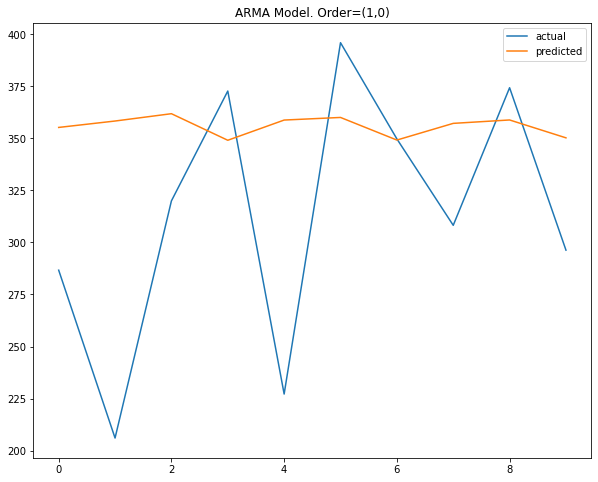

In [151]:
actual = []; pred = []

for i in range(len(predictions)):
    actual.append(test["Sales"][i])
    pred.append(predictions[i])

df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

msg = 'ARMA Model. Order=(' + str(p) + ',' + str(q) + ')'
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)
plt.show()

In [152]:
### Perform the LJung-Box test


# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

[0.98145072]
Fail-to-Reject H0. Good model


In [153]:
### Calculate MSE and RMSE of the Model from the test

# MSE
# RMSE
msg = 'ARMA Model. Order=(' + str(p) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

print(df_res)

ARMA Model. Order=(1,0)
	MSE = 5435.993694598221
	RMSE = 73.72919160412802
       actual   predicted         err
0  286.669600  355.239700  -68.570100
1  206.044502  358.316200 -152.271698
2  319.953928  361.835443  -41.881515
3  372.717386  349.074681   23.642706
4  227.173500  358.783996 -131.610496
5  395.945487  360.035467   35.910020
6  349.737422  349.176783    0.560638
7  308.226313  357.189854  -48.963541
8  374.310253  358.823686   15.486566
9  296.296857  350.240727  -53.943870


Text(0.5, 1.0, 'ARMA Model. Order=(1,0)')

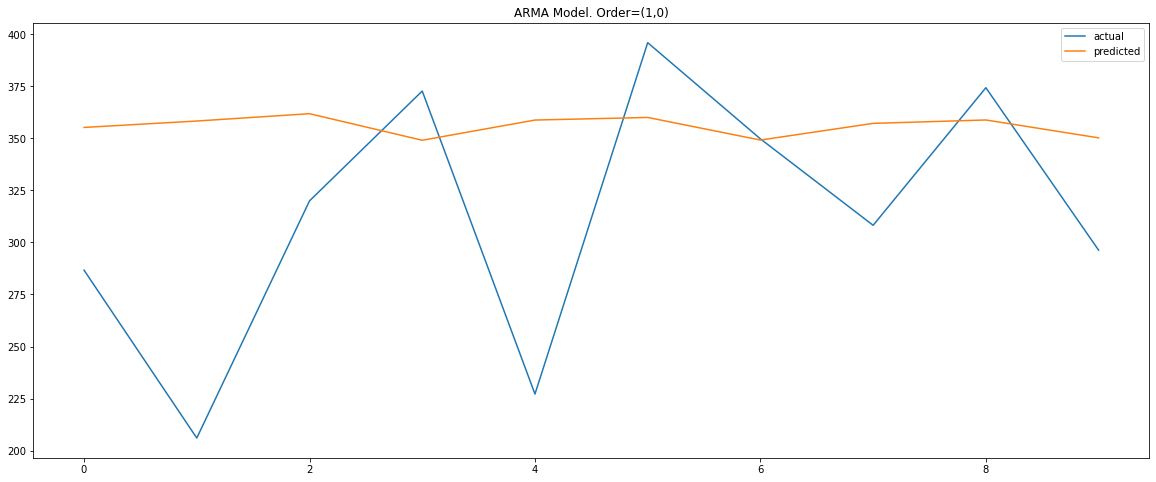

In [154]:
### Plot the actual data and predicted data

df_res.actual.plot(figsize=(20,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)

### Build the ARIMA model

In [155]:
# start with initial values for p and q based on auto_arima recommendation
p=1; d=0; q=1
m1 = ARIMA(train['Sales'],order=(p,d,q)).fit()
print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   38
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -226.165
Date:                Thu, 05 May 2022   AIC                            460.331
Time:                        09:22:33   BIC                            466.881
Sample:                    01-31-2014   HQIC                           462.661
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        355.3006     21.432     16.578      0.000     313.295     397.306
ar.L1          0.0416      2.784      0.015      0.988      -5.414       5.498
ma.L1         -0.1153      2.775     -0.042      0.9

#### Predict the test data using the model

In [156]:
# predictions
start = len(train) 
end = len(train) + len(test) - 1

print('start = {}, end = {}'.format(start,end))

predictions = m1.predict(start,end,typ='levels')
print(predictions)


start = 38, end = 47
2017-03-31    362.846305
2017-04-30    355.614835
2017-05-31    355.313675
2017-06-30    355.301133
2017-07-31    355.300611
2017-08-31    355.300589
2017-09-30    355.300588
2017-10-31    355.300588
2017-11-30    355.300588
2017-12-31    355.300588
Freq: M, Name: predicted_mean, dtype: float64


## Collate actual, predicted, and error values together

start = 38, end = 47
                actual   predicted         err
2017-03-31  286.669600  362.846305  -76.176705
2017-04-30  206.044502  355.614835 -149.570333
2017-05-31  319.953928  355.313675  -35.359747
2017-06-30  372.717386  355.301133   17.416253
2017-07-31  227.173500  355.300611 -128.127111
2017-08-31  395.945487  355.300589   40.644898
2017-09-30  349.737422  355.300588   -5.563166
2017-10-31  308.226313  355.300588  -47.074275
2017-11-30  374.310253  355.300588   19.009665
2017-12-31  296.296857  355.300588  -59.003731


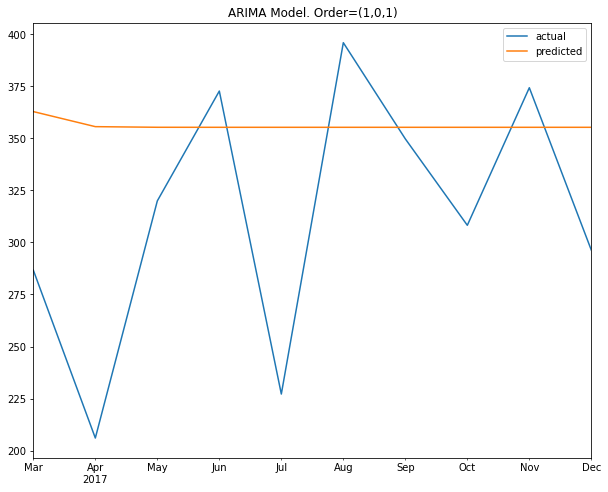

In [157]:
# predictions
start = len(train) 
end = len(train) + len(test) - 1

print('start = {}, end = {}'.format(start,end))

predictions = m1.predict(start,end,typ='levels')

df_res = pd.DataFrame({'actual':actual, 'predicted':predictions})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

msg = 'ARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)
plt.show()

In [158]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [159]:
# MSE
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARIMA Model. Order=(1,0,1)
	MSE = 5388.612060068306
	RMSE = 73.40716627188593


Text(0.5, 1.0, 'ARIMA Model. Order=(1,0,1)')

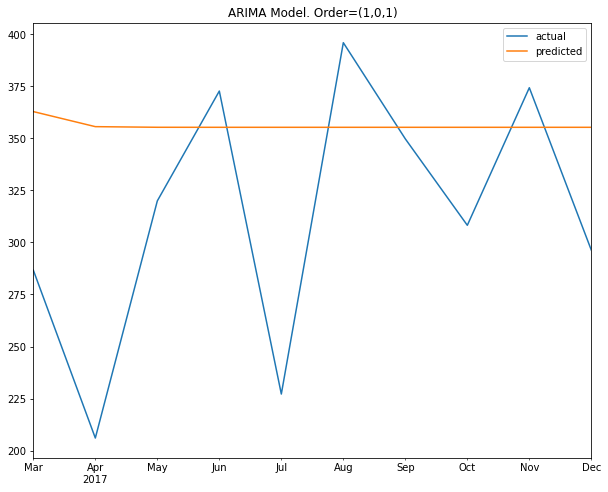

In [160]:
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)

### Forecast the future data using the model

In [161]:
# forecast into the future
m2 = ARIMA(sales,order=(p,d,q)).fit()
fcast = m2.predict(start=len(sales), end=len(sales)+11, typ='levels')
print(fcast)

2018-01-31    348.691010
2018-02-28    346.157597
2018-03-31    346.566006
2018-04-30    346.500167
2018-05-31    346.510781
2018-06-30    346.509070
2018-07-31    346.509346
2018-08-31    346.509301
2018-09-30    346.509308
2018-10-31    346.509307
2018-11-30    346.509307
2018-12-31    346.509307
Freq: M, Name: predicted_mean, dtype: float64


Text(0.5, 1.0, 'ARIMA Model. Order=(1,0,1)')

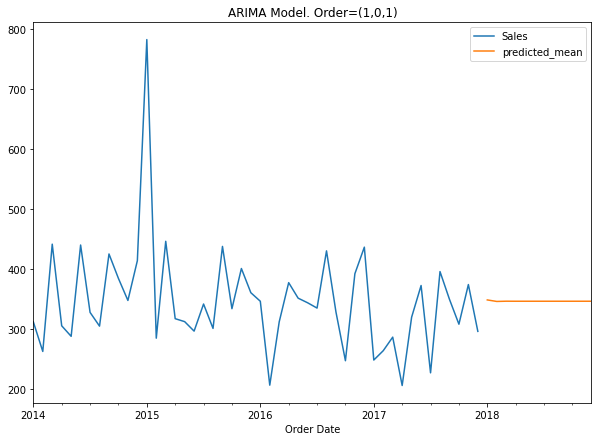

In [162]:
sales.plot(figsize=(10,7),legend=True)
fcast.plot(legend=True)
plt.title(msg)

## SARIMA

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from pandas.tseries.offsets import DateOffset

In [172]:
p=1; q=1; d=0
m1 = sm.tsa.statespace.SARIMAX(train,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
print(m1.summary())


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   38
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -229.919
Date:                            Thu, 05 May 2022   AIC                            469.838
Time:                                    09:22:56   BIC                            478.026
Sample:                                01-31-2014   HQIC                           472.751
                                     - 02-28-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.010    103.010      0.000       0.981       1.019
ma.L1         -0.9718      0.351   

In [173]:
# for interactive visualizations
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
from plotly import tools

import plotly.figure_factory as ff

In [166]:
start = len(train)
end = len(train) + len(test) - 1

print('start = {}, end = {}'.format(start,end))

predictions = m1.predict(start=start,end=end,dynamic=True)

df_res = pd.DataFrame({'actual':actual, 'predicted':predictions})
df_res['err'] = df_res.actual - df_res.predicted
df_res

start = 38, end = 47


,actual,predicted,err
2017-03-31,286.669600,369.245085,-82.575485
2017-04-30,206.044502,303.546194,-97.501692
2017-05-31,319.953928,287.365429,32.588500
2017-06-30,372.717386,329.683622,43.033764
2017-07-31,227.173500,304.617416,-77.443916
2017-08-31,395.945487,315.885778,80.059710
2017-09-30,349.737422,365.883671,-16.146249
2017-10-31,308.226313,291.427462,16.798851
2017-11-30,374.310253,349.858806,24.451446
2017-12-31,296.296857,371.456368,-75.159512


<AxesSubplot:>

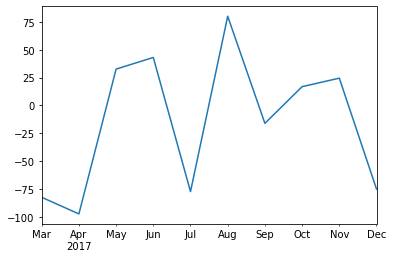

In [167]:
df_res.err.plot()

<AxesSubplot:>

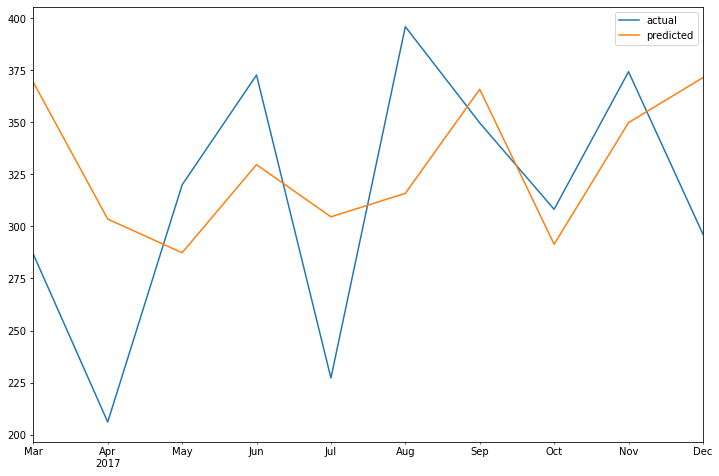

In [168]:
# plot
df_res[['actual','predicted']].plot(figsize=(12,8))

In [169]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1])[1][0]
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [170]:
# MSE
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
msg = 'SARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

SARIMA Model. Order=(1,1,1)
	MSE = 3843.6051346459003
	RMSE = 61.99681552020152


2018-01-31    261.220510
2018-02-28    165.886680
2018-03-31    306.416124
2018-04-30    271.946984
2018-05-31    250.593069
2018-06-30    321.755160
2018-07-31    262.300586
2018-08-31    297.928347
2018-09-30    306.868947
2018-10-31    246.760862
2018-11-30    300.337422
2018-12-31    356.036777
2019-01-31    444.319684
2019-02-28    206.489446
2019-03-31    295.787816
2019-04-30    192.854146
2019-05-31    246.345432
2019-06-30    264.712739
2019-07-31    215.344784
2019-08-31    278.823306
2019-09-30    323.575674
2019-10-31    252.175212
2019-11-30    317.297599
2019-12-31    259.831502
2020-01-31    213.500651
Freq: M, Name: predicted_mean, dtype: float64


Text(0.5, 1.0, 'SARIMA Model. Order=(1,1,1)')

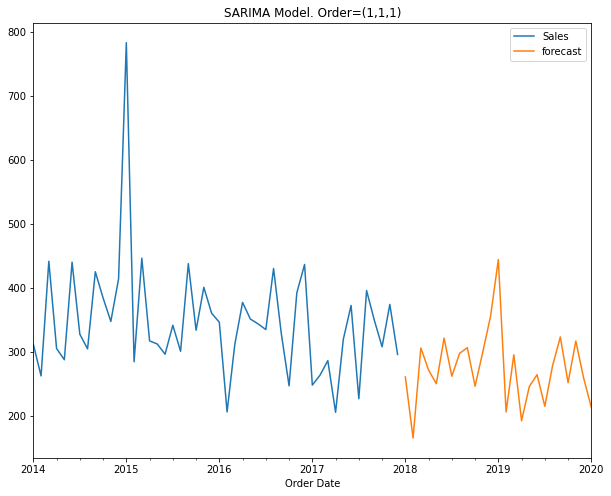

In [171]:
p = 1; d = 1; q = 1
m3_f = sm.tsa.statespace.SARIMAX(sales,order=(p,d,q),seasonal_order=(0,d,q,24)).fit()
fcast = m3_f.predict(start=len(sales), end=len(sales)+24, typ='levels')
print(fcast)

sales.plot(figsize=(10,8),legend=True)
fcast.plot(legend=True,label = 'forecast')
plt.title(msg)